# Basics for the financial data analysis

(Almost all codes are quoted to signate J-Quants competition tutorial https://japanexchangegroup.github.io/J-Quants-Tutorial/#_%E8%B2%A1%E5%8B%99%E8%AB%B8%E8%A1%A8%E3%81%A7%E6%A0%AA%E4%BE%A1%E3%81%AE%E5%85%88%E8%A1%8C%E3%81%8D%E3%82%92%E4%BA%88%E6%B8%AC%E3%81%97%E3%82%88%E3%81%86)

**Signate** (Japanese competition platform for Data Scientists) opened a financial competition from 29th Jan. 2021 through the end of June 2021. The competition called : **Fundamentals Analysis Challenge supported by Japan Exchange Group** (https://signate.jp/competitions/423).  
It attracted large atthention as a first massive educational competition to improve financial literacy for the individual investors in Japan.  Among all, the quality of the official tutorial calls a certain level of reputation, and many potential investors or novice of data scientists have got to know the competion after it is finished.

Contrast to Kaggle platform, Signate suspends the distribution of datasets as soon as the competition closes. Also late submission system doesn't work after the period. It's regulation forces all participants to delete the distributed data as well. Therefore there is no legal way to follow up the reputational tutorials due to lack of data. 

This repository via GitPod provides a sample data from a 3rd party, Quandl(https://www.quandl.com/tools/api) - a NASDAQ platform -,  in order to self-educate the financial data basics with the competition notebook code.

Last but not least, Signate has annonced the intention to publish "signate quest" for this competition around the August 2021. We highly recommend to check and follow the official site : https://quest.signate.jp/

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.4 Data loading

In [2]:
inputs = {
    "stock_price": f"./quandl_data/stock_price.csv",
    "stock_fin": f"./quandl_data/stock_fin.csv",
}

dfs = {}
for k, v in inputs.items():
        print(k)
        dfs[k] = pd.read_csv(v)
        if k == "stock_price":
            dfs[k].loc[:, "datetime"] = pd.to_datetime(
                dfs[k].loc[:, "Date"]
            )
            dfs[k].set_index("datetime", inplace=True)
        elif k in ["stock_fin", "stock_fin_price", "stock_labels"]:
            dfs[k].loc[:, "datetime"] = pd.to_datetime(
                dfs[k].loc[:, "date"]
            )
            dfs[k].set_index("datetime", inplace=True)

stock_price
stock_fin


In [3]:
for k in inputs.keys():
    print(k)
    print(dfs[k].info())
    print(dfs[k].head(1).T)

stock_price
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2690 entries, 2007-01-04 to 2017-12-22
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2690 non-null   object 
 1   Open    2690 non-null   float64
 2   High    2690 non-null   float64
 3   Low     2690 non-null   float64
 4   Close   2690 non-null   float64
 5   Volume  2689 non-null   float64
dtypes: float64(5), object(1)
memory usage: 147.1+ KB
None
datetime  2007-01-04
Date      2007-01-04
Open         30950.0
High         31200.0
Low          29820.0
Close        29960.0
Volume       82400.0
stock_fin
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14228 entries, 2020-03-31 to 2014-03-31
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   None                    14228 non-null  int64  
 1   company_code            14228 non-null  object 
 2   label    

## 2.5 EDA
### 2.

JCF data from quandl (free sample for Nintendo) contains P/L, BS, OCI, EQ, CF, Summary as fundamentals.  
```
$ fin_data['label_type'].unique()
array(['pl', 'bs', 'oci', 'eq', 'summary', 'cf'], dtype=object)
```

In precide, it contains the following information :
```
$ fin_data['label'].unique()
array(['WriteDownsOfInventories', 'WorkInProcess',
       'ValuationDifferenceOnAvailableForSaleSecuritiesNetOfTaxOCI',
       'ValuationDifferenceOnAvailableForSaleSecurities',
       'ValuationAndTranslationAdjustments', 'TreasuryStock',
       'TotalSaleAmountForDecreasedSharesSharesOtherThanThoseNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'TotalSaleAmountForDecreasedSharesSharesNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'TotalNumberOfSharesHeldTreasurySharesEtc',
       'TotalChangesOfItemsDuringThePeriod',
       'TotalAssetsSummaryOfBusinessResults',
       'TotalAcquisitionCostForIncreasedSharesSharesOtherThanThoseNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'TotalAcquisitionCostForIncreasedSharesSharesNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'ToolsFurnitureAndFixturesNet', 'SubtotalOpeCF', 'Software',
       'ShortTermInvestmentSecurities',
       'ShareOfOtherComprehensiveIncomeOfAssociatesAccountedForUsingEquityMethodOCI',
       'ShareholdingRatioTreasurySharesEtc', 'ShareholdingRatio',
       'ShareholdersEquity', 'SellingGeneralAndAdministrativeExpenses',
       'SalesDiscountsNOE', 'SalariesAllowancesAndBonusesSGA',
       'RetirementOfTreasuryStock', 'RetirementBenefitExpensesSGA',
       'RetainedEarnings', 'RestructuringLossEL', 'RestatedBalance',
       'ResearchAndDevelopmentExpensesSGA',
       'ResearchAndDevelopmentExpensesResearchAndDevelopmentActivities',
       'ResearchAndDevelopmentExpensesIncludedInGeneralAndAdministrativeExpensesAndManufacturingCostForCurrentPeriod',
       'RawMaterialsAndSupplies',
       'RateOfReturnOnEquitySummaryOfBusinessResults',
       'PurchaseOfTreasuryStockFinCF', 'PurchaseOfTreasuryStock',
       'PurchaseOfShortTermAndLongTermInvestmentSecuritiesInvCF',
       'PurchaseOfSharesOfConsolidatedSubsidiaries',
       'PurchaseOfPropertyPlantAndEquipmentAndIntangibleAssetsInvCF',
       'ProvisionOfAllowanceForDoubtfulAccountsSGA',
       'ProvisionForBonusesSGA', 'ProvisionForBonuses', 'ProvisionCL',
       'PropertyPlantAndEquipment',
       'ProfitLossAttributableToOwnersOfParentSummaryOfBusinessResults',
       'ProfitLossAttributableToOwnersOfParent',
       'ProfitLossAttributableToNonControllingInterests', 'ProfitLoss',
       'ProceedsFromWithdrawalOfTimeDepositsInvCF',
       'ProceedsFromSalesOfTreasuryStockFinCF',
       'ProceedsFromSalesOfPropertyPlantAndEquipmentAndIntangibleAssetsInvCF',
       'ProceedsFromSalesAndRedemptionOfShortTermAndLongTermInvestmentSecuritiesInvCF',
       'ProceedsFromPurchaseOfInvestmentsInSubsidiariesResultingInChangeInScopeOfConsolidationInvCF',
       'PriceEarningsRatioSummaryOfBusinessResults',
       'PaymentsIntoTimeDepositsInvCF', 'OtherNOI', 'OtherNOE',
       'OtherNetOpeCF', 'OtherNetInvCF', 'OtherNetFinCF', 'OtherNCL',
       'OtherIOA', 'OtherIA', 'OtherComprehensiveIncome', 'OtherCL',
       'OtherCA', 'OrdinaryIncomeLossSummaryOfBusinessResults',
       'OrdinaryIncome', 'OperatingIncome',
       'NumberOfVotingRightsIssuedSharesVotingRights',
       'NumberOfSharesIssuedSharesVotingRights',
       'NumberOfSharesHeldInOwnNameTreasurySharesEtc',
       'NumberOfSharesHeldInOthersNamesTreasurySharesEtc',
       'NumberOfSharesHeld',
       'NumberOfIssuesWhoseNumberOfSharesIncreasedSharesOtherThanThoseNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'NumberOfIssuesWhoseNumberOfSharesIncreasedSharesNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'NumberOfIssuesWhoseNumberOfSharesDecreasedSharesOtherThanThoseNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'NumberOfIssuesWhoseNumberOfSharesDecreasedSharesNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'NumberOfIssuesSharesOtherThanThoseNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'NumberOfIssuesSharesNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'NumberOfEmployees', 'NumberOfConsolidatedSubsidiaries',
       'NumberOfAssociatesAccountedForUsingEquityMethod',
       'NotesAndAccountsReceivableTrade', 'NotesAndAccountsPayableTrade',
       'NonOperatingIncome', 'NonOperatingExpenses',
       'NoncurrentLiabilities', 'NoncurrentAssets',
       'NonControllingInterests', 'NonAuditFeesTotalNetworkFirms',
       'NonAuditFeesTotal', 'NonAuditFeesReportingCompanyNetworkFirms',
       'NonAuditFeesReportingCompany',
       'NonAuditFeesConsolidatedSubsidiariesNetworkFirms',
       'NonAuditFeesConsolidatedSubsidiaries',
       'NetSalesSummaryOfBusinessResults', 'NetSales',
       'NetIncreaseDecreaseInCashAndCashEquivalents',
       'NetIncomeLossSummaryOfBusinessResults', 'NetIncome',
       'NetDefinedBenefitLiability', 'NetDefinedBenefitAsset',
       'NetChangesOfItemsOtherThanShareholdersEquity',
       'NetCashProvidedByUsedInOperatingActivitiesSummaryOfBusinessResults',
       'NetCashProvidedByUsedInOperatingActivities',
       'NetCashProvidedByUsedInInvestmentActivities',
       'NetCashProvidedByUsedInInvestingActivitiesSummaryOfBusinessResults',
       'NetCashProvidedByUsedInFinancingActivitiesSummaryOfBusinessResults',
       'NetCashProvidedByUsedInFinancingActivities',
       'NetAssetsSummaryOfBusinessResults',
       'NetAssetsPerShareSummaryOfBusinessResults', 'NetAssets',
       'MinorityInterestsInIncome', 'MinorityInterests',
       'MachineryEquipmentAndVehiclesNet',
       'LossOnValuationOfInvestmentSecuritiesEL',
       'LossOnSalesOfInvestmentSecuritiesEL',
       'LossOnRedemptionOfSecuritiesNOE', 'LossOnLitigationEL',
       'LossOnDisposalOfNoncurrentAssetsEL',
       'LossGainOnValuationOfInvestmentSecuritiesOpeCF',
       'LossGainOnSalesOfShortTermAndLongTermInvestmentSecuritiesOpeCF',
       'LiabilitiesAndNetAssets', 'Liabilities', 'Land',
       'InvestmentSecurities', 'InvestmentsAndOtherAssets', 'Inventories',
       'InterestIncomeNOI', 'InterestExpensesPaidOpeCFFinCF',
       'InterestAndDividendsIncomeReceivedOpeCFInvCF',
       'InterestAndDividendsIncomeOpeCF', 'IntangibleAssets',
       'IncreaseDecreaseInNotesAndAccountsPayableTradeOpeCF',
       'IncreaseDecreaseInNetDefinedBenefitLiabilityOpeCF',
       'IncreaseDecreaseInAllowanceForDoubtfulAccountsOpeCF',
       'IncreaseDecreaseInAccruedConsumptionTaxesOpeCF',
       'IncomeTaxesPayable', 'IncomeTaxesPaidOpeCF',
       'IncomeTaxesDeferred', 'IncomeTaxesCurrent', 'IncomeTaxes',
       'IncomeBeforeMinorityInterests', 'IncomeBeforeIncomeTaxes',
       'ImpairmentLossOpeCF', 'ImpairmentLossEL', 'GrossProfit',
       'GainOnSalesOfSubsidiariesStocksEI',
       'GainOnSalesOfNoncurrentAssetsEI',
       'GainOnSalesOfInvestmentSecuritiesEI',
       'GainOnRedemptionOfSecuritiesNOI', 'ForeignExchangeLossesNOE',
       'ForeignExchangeLossesGainsOpeCF', 'ForeignExchangeGainsNOI',
       'ForeignCurrencyTranslationAdjustmentNetOfTaxOCI',
       'ForeignCurrencyTranslationAdjustment', 'FinishedGoods',
       'ExtraordinaryLoss', 'ExtraordinaryIncome',
       'EquityToAssetRatioSummaryOfBusinessResults',
       'EquityInEarningsOfAffiliatesNOI',
       'EquityInEarningsLossesOfAffiliatesOpeCF',
       'EffectOfExchangeRateChangeOnCashAndCashEquivalents',
       'DividendsFromSurplus', 'DisposalOfTreasuryStock',
       'DilutedEarningsPerShareSummaryOfBusinessResults',
       'DepreciationSGA', 'DepreciationAndAmortizationOpeCF',
       'DeferredTaxAssetsIOA', 'DeferredTaxAssetsCA', 'DeferredTaxAssets',
       'DecreaseIncreaseInNotesAndAccountsReceivableTradeOpeCF',
       'DecreaseIncreaseInInventoriesOpeCF', 'CurrentLiabilities',
       'CurrentAssets', 'CumulativeEffectsOfChangesInAccountingPolicies',
       'CostOfSales', 'ConstructionInProgress',
       'ComprehensiveIncomeSummaryOfBusinessResults',
       'ComprehensiveIncomeAttributableToOwnersOfTheParent',
       'ComprehensiveIncomeAttributableToNonControllingInterests',
       'ComprehensiveIncomeAttributableToMinorityInterests',
       'ComprehensiveIncome', 'CashDividendsPaidFinCF', 'CashAndDeposits',
       'CashAndCashEquivalentsSummaryOfBusinessResults',
       'CashAndCashEquivalents',
       'CarryingAmountSharesOtherThanThoseNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'CarryingAmountSharesNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'CapitalSurplus', 'CapitalStock',
       'CapitalExpendituresOverviewOfCapitalExpendituresEtc',
       'BuildingsAndStructuresNet',
       'BasicEarningsLossPerShareSummaryOfBusinessResults',
       'AverageNumberOfTemporaryWorkers', 'AuditFeesTotalNetworkFirms',
       'AuditFeesTotal', 'AuditFeesReportingCompanyNetworkFirms',
       'AuditFeesReportingCompany',
       'AuditFeesConsolidatedSubsidiariesNetworkFirms',
       'AuditFeesConsolidatedSubsidiaries', 'Assets',
       'AllowanceForDoubtfulAccountsIOAByGroup',
       'AllowanceForDoubtfulAccountsCA', 'AdvertisingExpensesSGA',
       'AccumulatedDepreciationPPEByGroup'], dtype=object)
```

In [6]:
def extract_fin(df, columns):
    for i, label in enumerate(columns):
        e = df[(df['label']==label) & (df['context_ref'].isin(['CurrentYTDDuration', 'CurrentYearDuration', 'CurrentQuarterInstant', 'CurrentYearInstant']))]
        if i==0:
            extracted=e
        else:
            extracted = pd.concat([extracted, e])
    return extracted

In [55]:
# Read stock_fin
fin = dfs["stock_fin"]

# Narrow down ticker code7974 : Nintendo
ticker = 7974
fin_data = fin[fin["ticker"] == ticker]

# Define what to plot
columns = ["NetSales",
           "OperatingIncome",
           "NetAssets"
          ]
fin_data = extract_fin(fin_data, columns)

fin_data = fin_data[['label', 'value', 'type_of_current_period']] \
    .set_index('type_of_current_period', append=True) \
    .pivot_table(values='value', index=['datetime', 'type_of_current_period'], columns='label') \
    .reset_index('type_of_current_period') \
    .rename(columns={'type_of_current_period' : 'ReportType'})

columns.append('ReportType')

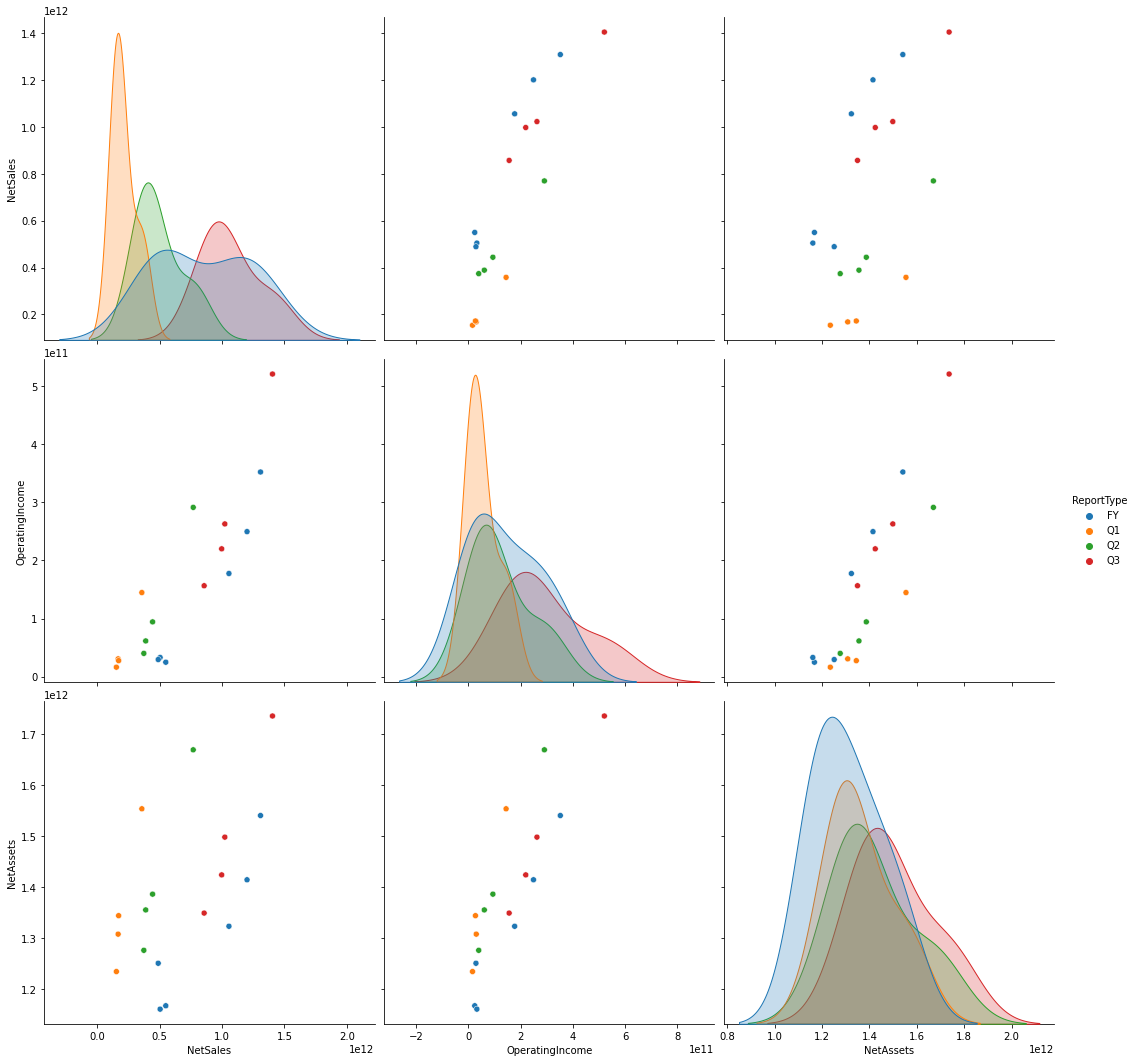

In [57]:
# plot
sns.pairplot(fin_data[columns], hue="ReportType", height=5)

### 2.5.2 stock_price

No handles with labels found to put in legend.


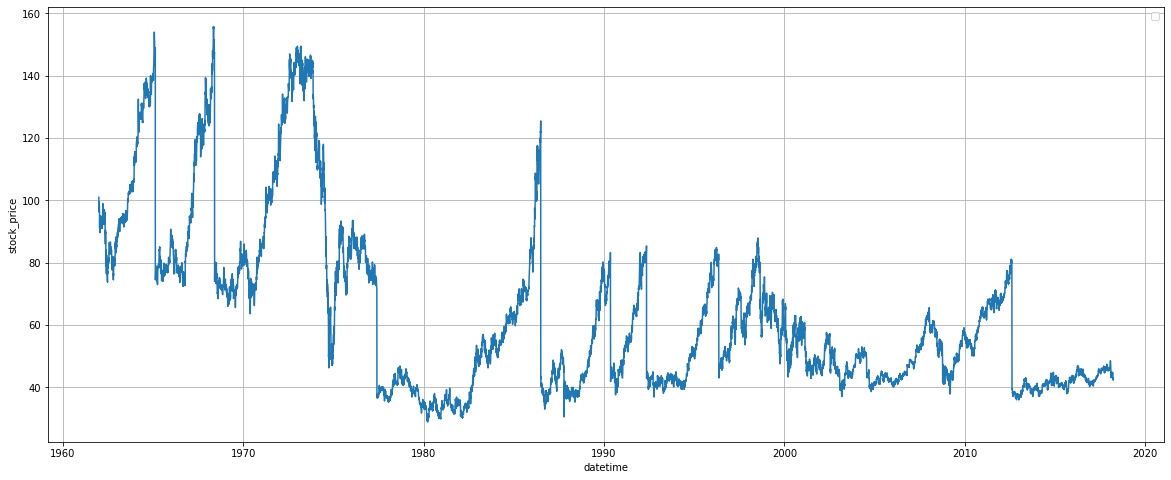

In [4]:
price_data = dfs["stock_price"]

# narrow down to a single stock code
# skipped since already narrowed down when load a stock price data from Quandl.

fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(price_data["Close"])
ax.set_ylabel("stock_price")
ax.set_xlabel("datetime")
ax.grid(True)
ax.legend()

### 2.5.3 Moving Average

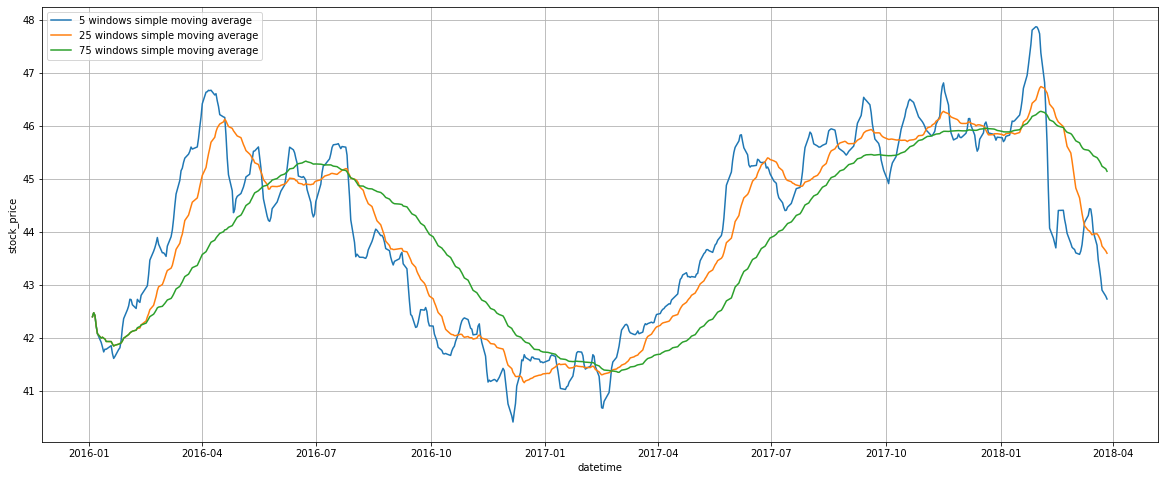

In [5]:
price_data = dfs["stock_price"]

# narrow down to a single stock code
# skipped since already narrowed down when load a stock price data from Quandl.

# delimited 2016:2019
price_data = price_data["2016":"2019"].copy()

# calculate MA for 5days, 25days, 75days
periods = [5, 25, 75]
cols = []
for period in periods:
    col = "{} windows simple moving average".format(period)
    price_data[col] = price_data["Close"].rolling(period, min_periods=1).mean()
    cols.append(col)

# plot
fig, ax = plt.subplots(figsize=(20, 8))

for col in cols:
    ax.plot(price_data[col], label=col)
ax.set_ylabel("stock_price")
ax.set_xlabel("datetime")
ax.grid(True)
ax.legend()

### 2.5.4 価格変化率

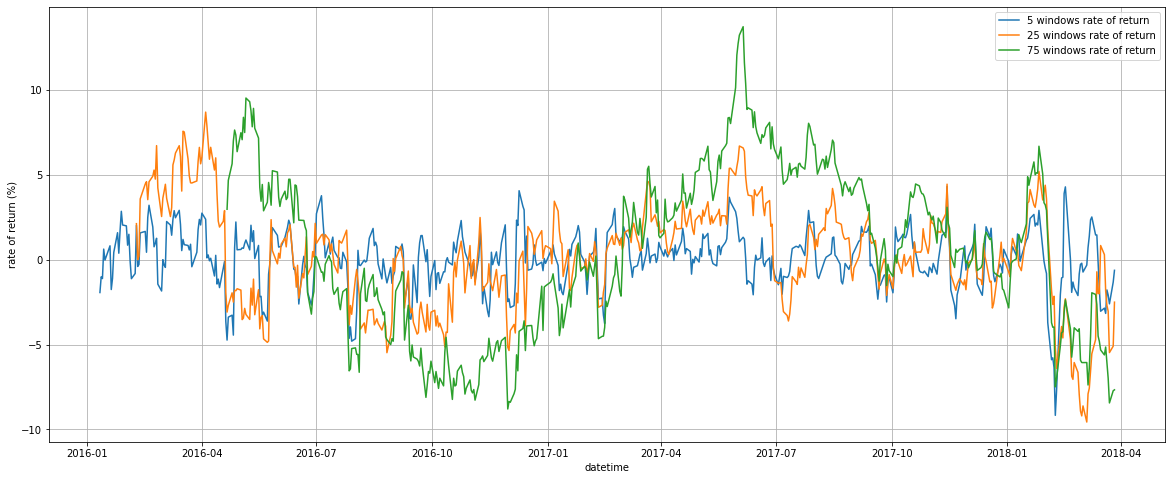

In [6]:
price_data = dfs["stock_price"]

# narrow down to a single stock code
# skipped since already narrowed down when load a stock price data from Quandl.

# delimited 2016:2019
price_data = price_data["2016":"2019"].copy()

# calculate price changing ratio for 5days, 25days, 75days
periods = [5, 25, 75]
cols = []
for period in periods:
    col = "{} windows rate of return".format(period)
    price_data[col] = price_data["Close"].pct_change(period) * 100
    cols.append(col)

# plot
fig, ax = plt.subplots(figsize=(20, 8))

for col in cols:
    ax.plot(price_data[col], label=col)
ax.set_ylabel("rate of return (%)")
ax.set_xlabel("datetime")
ax.grid(True)
ax.legend()

### 2.5.5. Historical Volatility

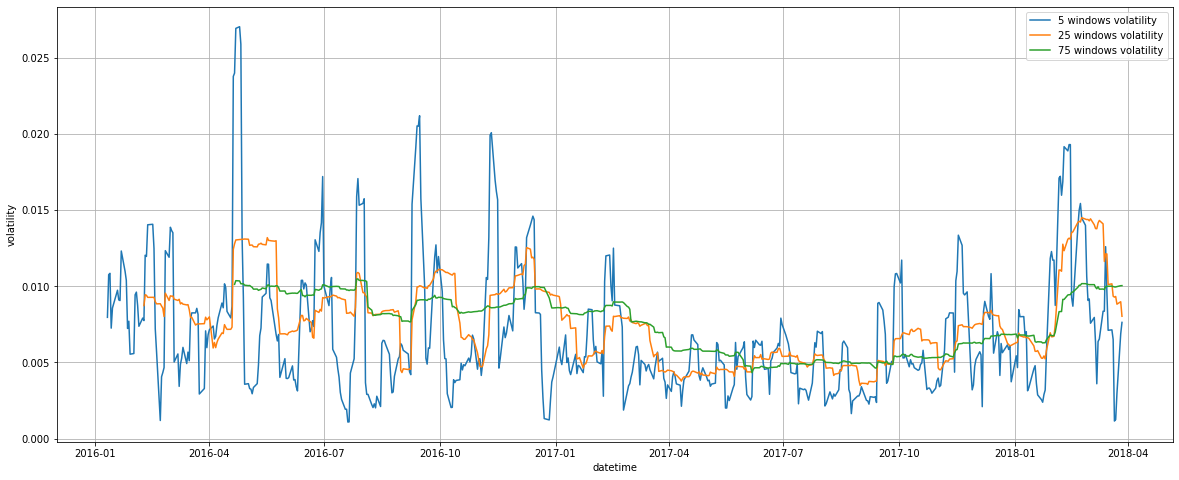

In [7]:
price_data = dfs["stock_price"]

# narrow down to a single stock code
# skipped since already narrowed down when load a stock price data from Quandl.

# delimited 2016:2019
price_data = price_data["2016":"2019"].copy()

# calculate HV for 5days, 25days, 75days
periods = [5, 25, 75]
cols = []
for period in periods:
    col = "{} windows volatility".format(period)
    price_data[col] = np.log(price_data["Close"]).diff().rolling(period).std()
    cols.append(col)

# plot
fig, ax = plt.subplots(figsize=(20, 8))

for col in cols:
    ax.plot(price_data[col], label=col)
ax.set_ylabel("volatility")
ax.set_xlabel("datetime")
ax.grid(True)
ax.legend()

### 2.5.6 plot altogether

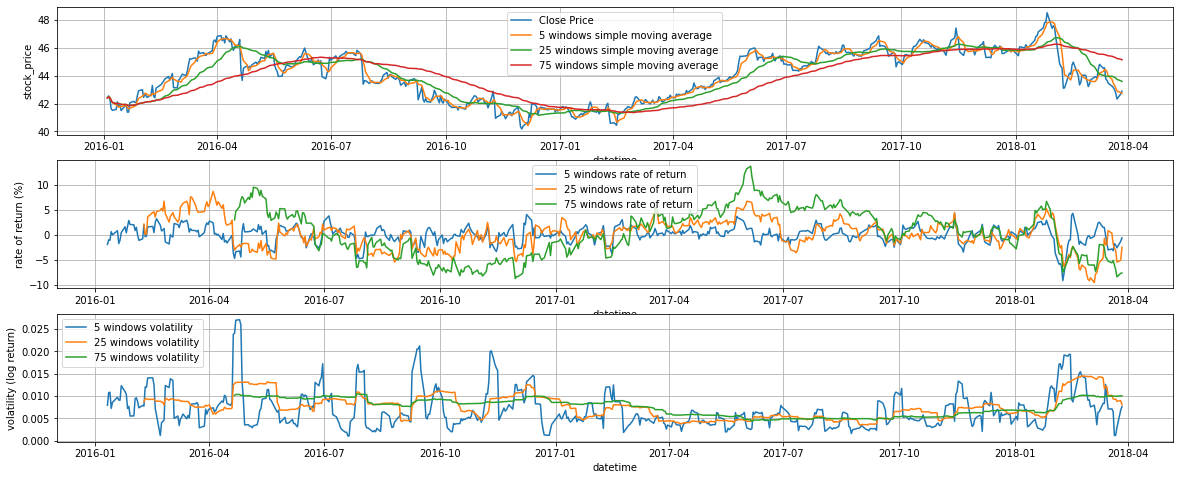

In [8]:
price_data = dfs["stock_price"]

# narrow down to a single stock code
# skipped since already narrowed down when load a stock price data from Quandl.

# delimited 2016:2019
price_data = price_data["2016":"2019"].copy()

# calculate indices for 5days, 25days, 75days
periods = [5, 25, 75]
ma_cols = []
# MA
for period in periods:
    col = "{} windows simple moving average".format(period)
    price_data[col] = price_data["Close"].rolling(period, min_periods=1).mean()
    ma_cols.append(col)

return_cols = []
# price changing ratio
for period in periods:
    col = "{} windows rate of return".format(period)
    price_data[col] = price_data["Close"].pct_change(period) * 100
    return_cols.append(col)

vol_cols = []
# Historical Volatility
for period in periods:
    col = "{} windows volatility".format(period)
    price_data[col] = np.log(price_data["Close"]).diff().rolling(period).std()
    vol_cols.append(col)

# plot
fig, ax = plt.subplots(nrows=3 ,figsize=(20, 8))

ax[0].plot(price_data["Close"], label="Close Price")

for col in ma_cols:
    ax[0].plot(price_data[col], label=col)

for col in return_cols:
    ax[1].plot(price_data[col], label=col)

for col in vol_cols:
    ax[2].plot(price_data[col], label=col)

ax[0].set_ylabel("stock_price")
ax[1].set_ylabel("rate of return (%)")
ax[2].set_ylabel("volatility (log return)")
for _ax in ax:
    _ax.set_xlabel("datetime")
    _ax.grid(True)
    _ax.legend()

## 2.7 Generate features

### 2.7.3 An example of generating features

In [9]:
price_data = dfs["stock_price"]

# narrow down to a single stock code
# skipped since already narrowed down when load a stock price data from Quandl.

# delimited 2016:2019
price_data = price_data["2016":"2019"].copy()

# Use the closure price
feats = price_data[["Close"]].copy()
# percent of change : 20 days
feats["return_1month"] = feats["Close"].pct_change(20)
# percent of change : 40 days
feats["return_2month"] = feats["Close"].pct_change(40)
# percent of change : 60 days
feats["return_3month"] = feats["Close"].pct_change(60)
# volatility of 20 days
feats["volatility_1month"] = (
    np.log(feats["Close"]).diff().rolling(20).std()
)
# volatility of 40 days
feats["volatility_2month"] = (
    np.log(feats["Close"]).diff().rolling(40).std()
)
# volatility of 60 days
feats["volatility_3month"] = (
    np.log(feats["Close"]).diff().rolling(60).std()
)
# Gap of MA20 and the closure
feats["MA_gap_1month"] = feats["Close"] / (
    feats["Close"].rolling(20).mean()
)
# Gap of MA40 and the closure
feats["MA_gap_2month"] = feats["Close"] / (
    feats["Close"].rolling(40).mean()
)
# Gap of MA60 and the closure
feats["MA_gap_3month"] = feats["Close"] / (
    feats["Close"].rolling(60).mean()
)
feats = feats.fillna(0)
feats = feats.drop(["Close"], axis=1)

### 2.8.2 holdout validation

In [10]:
TRAIN_END = "2017-12-31"
VAL_START = "2018-02-01"
VAL_END = "2018-12-01"
TEST_START = "2019-01-01"

## 2.9 modeling

In [ ]:
def get_features_for_predict(dfs, code, start_dt="2016-01-01"):
    """
    Args:
        dfs (dict)  : dict of pd.DataFrame include stock_fin, stock_price
        code (int)  : A local code for a listed company
        start_dt (str): specify date range
    Returns:
        feature DataFrame (pd.DataFrame)
    """

    # stock_priceデータを読み込む
    price = dfs["stock_price"]
    # 終値のみに絞る
    feats = price[["Close"]]
    # 特徴量の生成対象期間を指定
    feats = feats.loc[pd.Timestamp(start_dt) - pd.offsets.BDay(n) :].copy()

    # Use the closure price
    feats = price_data[["Close"]].copy()
    # percent of change : 20 days
    feats["return_1month"] = feats["Close"].pct_change(20)
    # percent of change : 40 days
    feats["return_2month"] = feats["Close"].pct_change(40)
    # percent of change : 60 days
    feats["return_3month"] = feats["Close"].pct_change(60)
    # volatility of 20 days
    feats["volatility_1month"] = (
        np.log(feats["Close"]).diff().rolling(20).std()
    )
    # volatility of 40 days
    feats["volatility_2month"] = (
        np.log(feats["Close"]).diff().rolling(40).std()
    )
    # volatility of 60 days
    feats["volatility_3month"] = (
        np.log(feats["Close"]).diff().rolling(60).std()
    )
    # Gap of MA20 and the closure
    feats["MA_gap_1month"] = feats["Close"] / (
        feats["Close"].rolling(20).mean()
    )
    # Gap of MA40 and the closure
    feats["MA_gap_2month"] = feats["Close"] / (
        feats["Close"].rolling(40).mean()
    )
    # Gap of MA60 and the closure
    feats["MA_gap_3month"] = feats["Close"] / (
        feats["Close"].rolling(60).mean()
    )
    # おおまかな手順の3つ目
    feats = feats.fillna(0)
    feats = feats.drop(["Close"], axis=1)

    # 財務データの特徴量とマーケットデータの特徴量のインデックスを合わせる
    feats = feats.loc[feats.index.isin(fin_feats.index)]
    fin_feats = fin_feats.loc[fin_feats.index.isin(feats.index)]

    # データを結合
    feats = pd.concat([feats, fin_feats], axis=1).dropna()

    # 欠損値処理を行います。
    feats = feats.replace([np.inf, -np.inf], 0)

    # 銘柄コードを設定
    feats["code"] = code

    # 生成対象日以降の特徴量に絞る
    feats = feats.loc[pd.Timestamp(start_dt) :]

    return feats